In [1]:
import os

import pandas as pd

from framework.dataset_specification import NamedDatasetSpecifications
from framework.enumerations import EvaluationDatasetSampling
from framework.flow_transformer_multi_classification import FlowTransformer
from framework.flow_transformer_parameters import FlowTransformerParameters
from implementations.classification_heads import *
from implementations.input_encodings import *
from implementations.pre_processings import StandardPreProcessing
from implementations.transformers.basic_transformers import BasicTransformer
from implementations.transformers.named_transformers import *


2024-10-13 13:21:40.870677: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-13 13:21:40.879594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 13:21:40.889221: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 13:21:40.892044: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 13:21:40.899816: I tensorflow/core/platform/cpu_feature_guar

In [2]:
encodings = [
    NoInputEncoder(),
    RecordLevelEmbed(64),
    CategoricalFeatureEmbed(EmbedLayerType.Dense, 16),
    CategoricalFeatureEmbed(EmbedLayerType.Lookup, 16),
    CategoricalFeatureEmbed(EmbedLayerType.Projection, 16),
    RecordLevelEmbed(64, project=True)
]

classification_heads = [
    LastTokenClassificationHead(),
    FlattenClassificationHead(),
    GlobalAveragePoolingClassificationHead(),
    CLSTokenClassificationHead(),
    FeaturewiseEmbedding(project=False),
    FeaturewiseEmbedding(project=True),
]

transformers = [
    BasicTransformer(2, 128, n_heads=2),
    BasicTransformer(2, 128, n_heads=2, is_decoder=True),
    GPTSmallTransformer(),
    BERTSmallTransformer()
]

In [3]:
flow_file_path = "./dataset"

datasets = [
    ("CSE_CIC_IDS", os.path.join(flow_file_path, "NF-CSE-CIC-IDS2018-v2_dropna.csv"), NamedDatasetSpecifications.unified_flow_format, 0.01, EvaluationDatasetSampling.LastRows),
    ("UNSW_NB15", os.path.join(flow_file_path, "NF-UNSW-NB15-v2.csv"), NamedDatasetSpecifications.unified_flow_format, 0.03, EvaluationDatasetSampling.LastRows),
    ("UNSW_NB15-2", os.path.join(flow_file_path, "NF-UNSW-NB15-v2.csv"), NamedDatasetSpecifications.unified_flow_format, 0.1, EvaluationDatasetSampling.LastRows),
]


In [4]:
pre_processing = StandardPreProcessing(n_categorical_levels=32)

# Define the transformer
ft = FlowTransformer(pre_processing=pre_processing,
                     input_encoding=encodings[5],
                     sequential_model=transformers[0],
                     classification_head=classification_heads[0],
                     params=FlowTransformerParameters(window_size=10, mlp_layer_sizes=[128], mlp_dropout=0.1))

# Load the specific dataset
cache_folder = './content/cache_folder'
dataset_name, dataset_path, dataset_specification, eval_percent, eval_method = datasets[1]
ft.load_dataset(dataset_name, dataset_path, dataset_specification, cache_folder, evaluation_percent=eval_percent)


Attempting to read dataset from path ./dataset/NF-UNSW-NB15-v2.csv...
Set y to = Attack
Class map: {0: 'Analysis', 1: 'Backdoor', 2: 'Benign', 3: 'DoS', 4: 'Exploits', 5: 'Fuzzers', 6: 'Generic', 7: 'Reconnaissance', 8: 'Shellcode', 9: 'Worms'}
Class num: 10
Converting numerical columns to floats, and removing out of range values...
Applying pre-processing to numerical values
[Numerical 1 / 28] Processing numerical column MAX_TTL...
[Numerical 2 / 28] Processing numerical column DURATION_IN...
[Numerical 3 / 28] Processing numerical column NUM_PKTS_256_TO_512_BYTES...
[Numerical 4 / 28] Processing numerical column RETRANSMITTED_OUT_BYTES...
[Numerical 5 / 28] Processing numerical column LONGEST_FLOW_PKT...
[Numerical 6 / 28] Processing numerical column DST_TO_SRC_SECOND_BYTES...
[Numerical 7 / 28] Processing numerical column NUM_PKTS_UP_TO_128_BYTES...
[Numerical 8 / 28] Processing numerical column OUT_PKTS...
[Numerical 9 / 28] Processing numerical column MIN_IP_PKT_LEN...
[Numerical 

,MAX_TTL,DURATION_IN,NUM_PKTS_256_TO_512_BYTES,RETRANSMITTED_OUT_BYTES,LONGEST_FLOW_PKT,DST_TO_SRC_SECOND_BYTES,NUM_PKTS_UP_TO_128_BYTES,OUT_PKTS,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,...,L7_PROTO_23,L7_PROTO_24,L7_PROTO_25,L7_PROTO_26,L7_PROTO_27,L7_PROTO_28,L7_PROTO_29,L7_PROTO_30,L7_PROTO_31,L7_PROTO_32
0,0.630549,0.0,0.000000,0.000000,0.565324,0.294070,0.326896,0.148859,0.608608,0.565324,...,False,False,False,False,False,False,False,False,False,False
1,0.630549,0.0,0.000000,0.284665,0.565324,0.317800,0.374701,0.223288,0.608608,0.565324,...,False,False,False,False,False,False,False,False,False,False
2,0.630549,0.0,0.000000,0.326006,0.575948,0.333895,0.408620,0.266827,0.608608,0.575948,...,False,False,False,False,False,False,False,False,False,False
3,0.630549,0.0,0.000000,0.353458,0.598516,0.346818,0.434929,0.297718,0.608608,0.598516,...,False,False,False,False,False,False,False,False,False,False
4,0.630549,0.0,0.000000,0.384771,0.598516,0.360391,0.465863,0.331913,0.608608,0.598516,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390270,0.630549,0.0,0.000000,0.435134,0.915812,0.375884,0.369683,0.290788,0.608608,0.915812,...,False,False,False,False,False,False,False,False,False,False
2390271,0.625000,0.0,0.000000,0.000000,0.565324,0.250994,0.189757,0.117968,0.659772,0.565324,...,False,False,False,False,False,False,False,False,False,False
2390272,0.630549,0.0,0.132745,0.529871,0.999258,0.439992,0.302415,0.257484,0.608608,0.999258,...,False,False,False,False,False,False,False,False,False,False
2390273,0.630549,0.0,0.000000,0.651557,0.984754,0.532558,0.536915,0.457722,0.608608,0.984754,...,False,False,False,False,False,False,False,False,False,False


In [5]:
m = ft.build_model()
m.summary()


I0000 00:00:1728796974.750870 1395301 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728796974.774774 1395301 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728796974.774908 1395301 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728796974.776083 1395301 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_MAX_TTL       │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_DURATION_IN   │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_NUM_PKTS_256… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_RETRANSMITTE… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_LONGEST_FLOW… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_DST_TO_SRC_S… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_NUM_PKTS_UP_… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_OUT_PKTS      │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_MIN_IP_PKT_L… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_MAX_IP_PKT_L… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_SHORTEST_FLO… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_RETRANSMITTE… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_TCP_WIN_MAX_… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_NUM_PKTS_512… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_IN_PKTS       │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_NUM_PKTS_102… │ (None, 10, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_DST_TO_SRC_A… │ (None, 10, 1)     │          0 │ -               

 Total params: 193,162 (754.54 KB)

 Trainable params: 193,162 (754.54 KB)

 Non-trainable params: 0 (0.00 B)

Classes in eval set:
	Benign
	Exploits
	Generic
	Fuzzers
	Backdoor
	DoS
	Reconnaissance
	Shellcode
	Worms
	Analysis
Building eval dataset...
Splitting dataset to featurewise...
Evaluation dataset is built!
Computing and print the number of each class in the evaluation set...
Attack class Benign samples in eval set: 68027
Attack class Exploits samples in eval set: 1562
Attack class Generic samples in eval set: 387
Attack class Fuzzers samples in eval set: 806
Attack class Backdoor samples in eval set: 25
Attack class DoS samples in eval set: 214
Attack class Reconnaissance samples in eval set: 607
Attack class Shellcode samples in eval set: 67
Attack class Worms samples in eval set: 10
Attack class Analysis samples in eval set: 3


I0000 00:00:1728797093.762136 1395406 service.cc:146] XLA service 0x7ea9ec014c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728797093.762158 1395406 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-10-13 13:24:53.821228: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-13 13:24:54.401019: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-13 13:24:54.782416: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_83', 12 bytes spill stores, 12 bytes spill loads

2024-10-13 13:24:55.535292: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function

Epoch = 0 / 5 (early stop in 5), step = 0, loss = 2.61125, results = [array(2.6112494, dtype=float32), array(0.0390625, dtype=float32)] -- elapsed (train): 0.00s
Epoch = 0 / 5 (early stop in 5), step = 4, loss = 2.28770, results = [array(2.2876973, dtype=float32), array(0.19375, dtype=float32)] -- elapsed (train): 1.55s
Epoch = 0 / 5 (early stop in 5), step = 8, loss = 2.13704, results = [array(2.137044, dtype=float32), array(0.26302084, dtype=float32)] -- elapsed (train): 2.78s
Epoch = 0 / 5 (early stop in 5), step = 12, loss = 2.02954, results = [array(2.0295362, dtype=float32), array(0.3064904, dtype=float32)] -- elapsed (train): 4.01s
Epoch = 0 / 5 (early stop in 5), step = 16, loss = 1.93281, results = [array(1.9328108, dtype=float32), array(0.3423713, dtype=float32)] -- elapsed (train): 5.24s
Epoch = 0 / 5 (early stop in 5), step = 20, loss = 1.84667, results = [array(1.8466692, dtype=float32), array(0.375, dtype=float32)] -- elapsed (train): 6.48s
Epoch = 0 / 5 (early stop in 5)

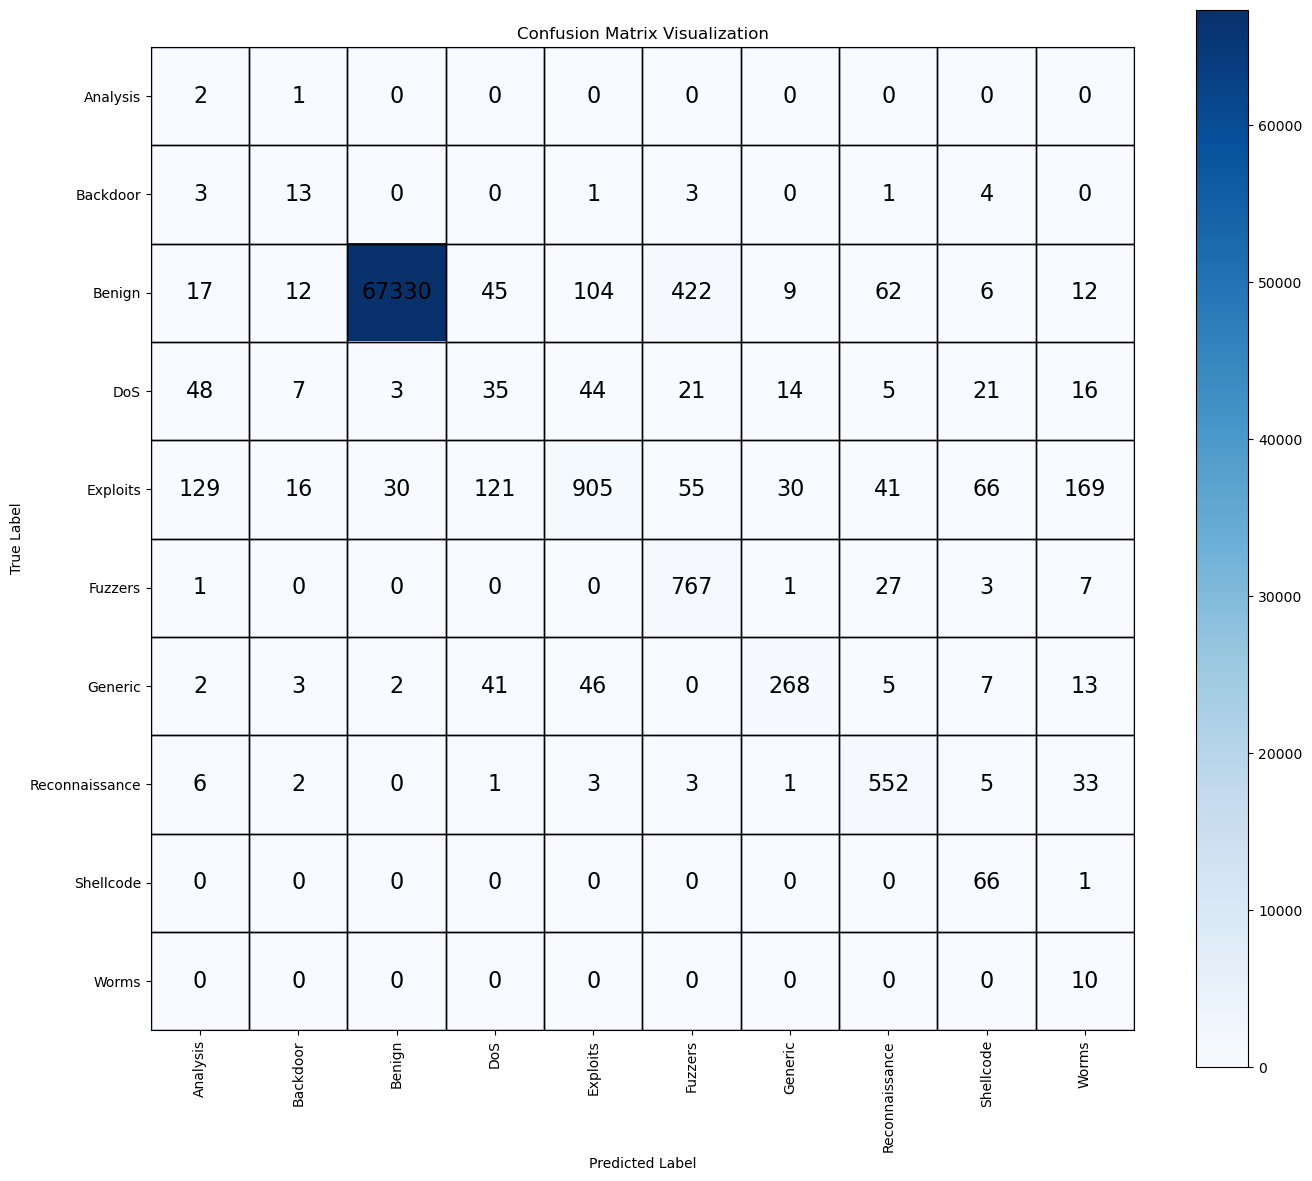

In [6]:
m.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'], jit_compile=True)

# Get the evaluation results
eval_results: pd.DataFrame
(train_results, eval_results, final_epoch) = ft.evaluate(m, batch_size=128, epochs=5, steps_per_epoch=64, early_stopping_patience=5)

# print(eval_results)